In [1]:
import numpy as np # linear algerbra
import pandas as pd # data processing
import seaborn as sns # data visualization
import matplotlib.pyplot as plt #drawing
from sklearn.model_selection import train_test_split


# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Importing and Exploring Dataset
#### First, we check the basic info of the dataset(trainset and testset)

In [2]:
data = pd.read_csv('../ProjectBookRatingPredictions/DataSet/Train_data.csv',error_bad_lines=False)
data.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,8253,Little Town on the Prairie (Little House #7),Laura Ingalls Wilder/Garth Williams,4.19,0060885432,9780060885434,eng,374,71853,646,1/1/2007,HarperTrophy
1,11101,First Comes Love (Hot Water California #1),Christie Ridgway,3.81,0380818957,9780380818952,en-US,384,1051,47,1/1/2002,Avon Books
2,28193,When Santa Fell to Earth,Cornelia Funke/Paul Howard/Oliver G. Latsch,3.76,043978204X,9780439782043,eng,167,1840,245,10/1/2006,Chicken House / Scholastic
3,25047,The Case of the Stinky Science Project (Jigsaw...,James Preller/John Speirs/James Preller,3.83,0439114284,9780439114288,en-US,80,162,11,3/1/2001,Scholastic Paperbacks
4,17800,Dance Dance Dance,Haruki Murakami,4.04,0099448769,9780099448761,eng,393,50169,2117,2/7/2002,Vintage


In [3]:
test = pd.read_csv('../ProjectBookRatingPredictions/DataSet/Test_data.csv',error_bad_lines=False)
test.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,28898,Fundamentals of Heat and Mass Transfer [with I...,Frank P. Incropera/David P. DeWitt,NaN,0470055545,9780470055540,en-US,997,6,0,10/30/2006,Wiley
1,39358,Stud Rites (A Dog Lover's Mystery #9),Susan Conant,NaN,0425201597,9780425201596,eng,237,322,16,3/1/2005,Berkley Prime Crime Books
2,32695,El talismán,Stephen King/Peter Straub/Pilar Giralt Gorina,NaN,8408042432,9788408042433,spa,375,12,1,7/1/2003,Planeta Publishing
3,15096,Five Quarters of the Orange,Joanne Harris,NaN,0060958022,9780060958022,eng,307,26258,1936,6/4/2002,Harper Perennial
4,15428,Up in a Heaval (Xanth #26),Piers Anthony,NaN,0812574990,9780812574999,eng,342,2364,25,10/19/2003,Tor Fantasy


In [4]:
data.describe() # Generate the summary table of the data

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000
mean,21266.538300,3.935645,9.763290e+12,336.340000,1.874233e+04,555.690600
std,13081.040856,0.345856,4.035128e+11,234.721368,1.178498e+05,2672.388675
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10230.000000,3.780000,9.780345e+12,194.000000,1.060000e+02,9.000000
50%,20261.000000,3.960000,9.780571e+12,300.000000,7.440000e+02,47.000000
75%,31986.750000,4.130000,9.780872e+12,416.000000,5.005500e+03,241.000000
max,45641.000000,5.000000,9.790008e+12,4736.000000,4.597666e+06,94265.000000


In [5]:
test.describe() # Generate the summary table of the testset

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,1000.000000,0.0,1.000000e+03,1000.000000,1000.000000,1000.00000
mean,21563.620000,NaN,9.723212e+12,339.037000,11178.416000,437.94100
std,13255.081966,NaN,7.439213e+11,300.059186,41155.854102,1533.60982
min,9.000000,NaN,2.004913e+10,0.000000,0.000000,0.00000
25%,10502.750000,NaN,9.780376e+12,191.750000,91.750000,9.00000
50%,19632.500000,NaN,9.780672e+12,292.000000,781.500000,46.00000
75%,32855.500000,NaN,9.780887e+12,409.000000,5149.750000,216.25000
max,45546.000000,NaN,9.789999e+12,6576.000000,541914.000000,23793.00000


In [6]:
data.info() # Check basic features and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              10000 non-null  int64  
 1   title               10000 non-null  object 
 2   authors             10000 non-null  object 
 3   average_rating      10000 non-null  float64
 4   isbn                10000 non-null  object 
 5   isbn13              10000 non-null  int64  
 6   language_code       10000 non-null  object 
 7     num_pages         10000 non-null  int64  
 8   ratings_count       10000 non-null  int64  
 9   text_reviews_count  10000 non-null  int64  
 10  publication_date    10000 non-null  object 
 11  publisher           10000 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 937.6+ KB


In [7]:
test.info() # Check testset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              1000 non-null   int64  
 1   title               1000 non-null   object 
 2   authors             1000 non-null   object 
 3   average_rating      0 non-null      float64
 4   isbn                1000 non-null   object 
 5   isbn13              1000 non-null   int64  
 6   language_code       1000 non-null   object 
 7     num_pages         1000 non-null   int64  
 8   ratings_count       1000 non-null   int64  
 9   text_reviews_count  1000 non-null   int64  
 10  publication_date    1000 non-null   object 
 11  publisher           1000 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 93.9+ KB


In [8]:
data.duplicated().any() # Check for doublication

False

In [9]:
test.duplicated().any()

False

<AxesSubplot:>

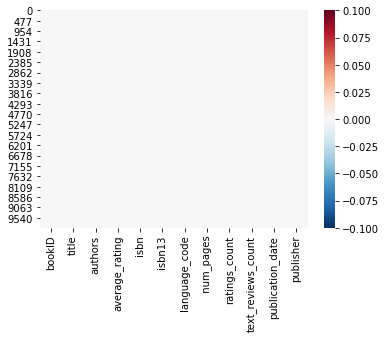

In [10]:
sns.heatmap(data.isnull(), cmap='RdBu_r') #Check if null in trainset

<AxesSubplot:>

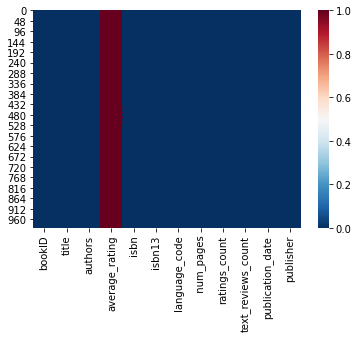

In [11]:
sns.heatmap(test.isnull(), cmap='RdBu_r') # Check if null in testset

#### No duplicated or missing values in the trainset, then we do data visualisation to further explore it.
#### And that will help us to do the data cleaning and feature engineering

# Data Visualisation

Text(0, 0.5, 'Frequency')

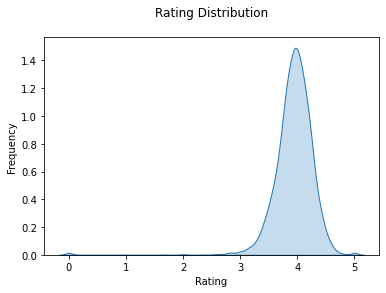

In [12]:
# rating distribution
sns.kdeplot(data['average_rating'],shade = True)
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Frequency')

#### we can see that most books are rated around 4

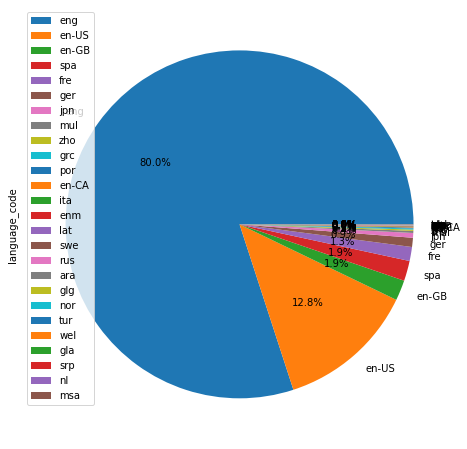

In [13]:
# top languages
data['language_code'].value_counts().head(100).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

#### The most used language in books is English

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '3.83'),
  Text(1, 0, '3.89'),
  Text(2, 0, '3.92'),
  Text(3, 0, '3.93'),
  Text(4, 0, '3.94'),
  Text(5, 0, '3.96'),
  Text(6, 0, '4.0'),
  Text(7, 0, '4.02'),
  Text(8, 0, '4.05'),
  Text(9, 0, '4.07')])

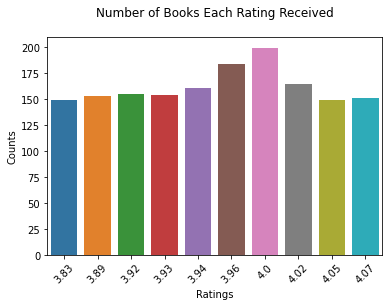

In [14]:
# number of books per rating
sns.barplot(data['average_rating'].value_counts().head(10).index, data['average_rating'].value_counts().head(10))
plt.title('Number of Books Each Rating Received\n')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.xticks(rotation=45)

<AxesSubplot:xlabel='ratings_count', ylabel='title'>

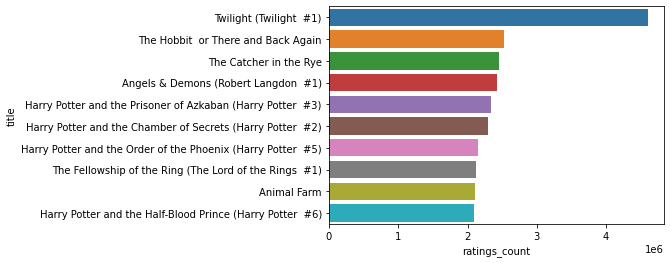

In [15]:
# highest rated books
popular_books = data.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
sns.barplot(popular_books, popular_books.index)

<AxesSubplot:xlabel='text_reviews_count', ylabel='title'>

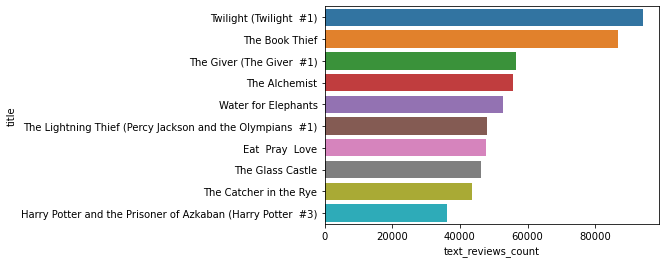

In [16]:
# highest reviewed books
highest_reviews = data.nlargest(10, ['text_reviews_count'])
sns.barplot(highest_reviews['text_reviews_count'], highest_reviews['title'])

Text(0.5, 0, 'Total Ratings')

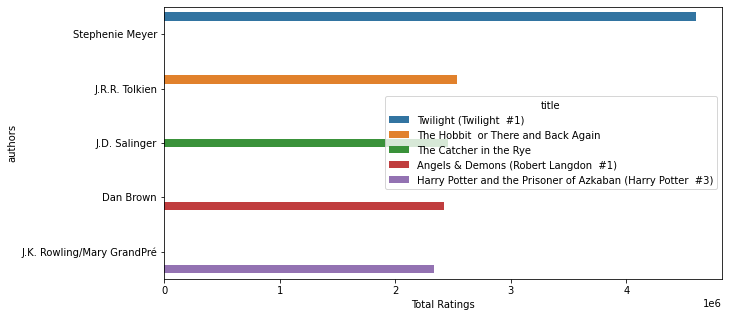

In [17]:
# authors with highest rated books
plt.figure(figsize=(10, 5))
authors = data.nlargest(5, ['ratings_count']).set_index('authors')
sns.barplot(authors['ratings_count'], authors.index, ci = None, hue = authors['title'])
plt.xlabel('Total Ratings')

Text(0.5, 0, 'No. of Publications')

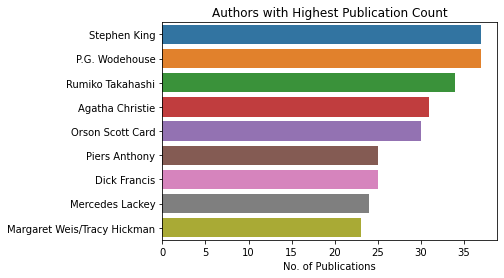

In [18]:
# authors with highest publications
top_authors = data['authors'].value_counts().head(9)
sns.barplot(top_authors, top_authors.index)
plt.title('Authors with Highest Publication Count')
plt.xlabel('No. of Publications')

# Data Preprocessing
**Next, we do the Data Cleaning and Feature Engineering**

### 1. Data Cleaning
We try to find and remove some extreme outliers from the features, since these values are abnormal distance from others, keeping them won't give any help to the accurancy of the model.

#### num_pages:

In [19]:
#first we remove the spaces of feature num_pages
data.rename(columns={"  num_pages":"num_pages"}, inplace=True)

<AxesSubplot:xlabel='num_pages'>

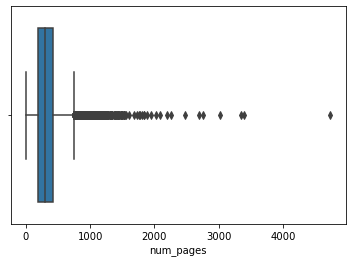

In [20]:
# find the outliers of num_pages
sns.boxplot(x=data['num_pages'])

The boxplot shows points between 1000 to 6000, the outliers are not included in the quartiles. So we drop them.

In [21]:
# remove outliers from pages number
data = data.drop(data.index[data['num_pages'] >= 1000])

In [22]:
data.shape

(9805, 12)

#### ratings_count:

<AxesSubplot:xlabel='ratings_count'>

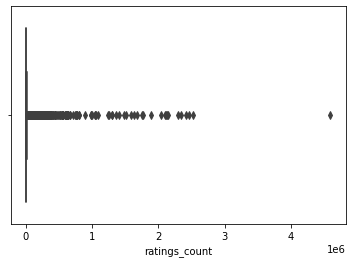

In [23]:
# find outliers of ratings_count
sns.boxplot(x=data['ratings_count'])

In [24]:
# remove outliers from ratings_count
data = data.drop(data.index[data['ratings_count'] >= 1000000])

In [25]:
# check meaningless rating
data[data['ratings_count'] == 0]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
103,15186,American Film Guide,Frank N. Magill,0.00,0893562505,9780893562502,eng,5,0,0,1/1/1983,Salem Press Inc
169,42863,Mission Possible,Kenneth H. Blanchard,3.44,0071348271,9780071348270,eng,242,0,0,4/30/1999,McGraw-Hill Companies
480,16806,The Man and the Author: John Milton: Twentieth...,J. Martin Evans,0.00,0415940478,9780415940474,eng,386,0,0,11/8/2002,Routledge
518,12712,Brodie's notes on Aldous Huxley's brave new world,Graham Handley,0.00,0333581296,9780333581292,eng,71,0,0,8/20/1992,Macmillan
559,38710,Super Fast Out of Control,Louis Sachar,3.75,0747566828,9780747566823,eng,128,0,0,5/2/2005,Bloomsbury Publishing PLC
...,...,...,...,...,...,...,...,...,...,...,...,...
8710,24749,American Writers Supplement VIII,Jay Parini/August Wilson,0.00,0684806371,9780684806372,eng,400,0,0,5/1/2001,Gale Cengage
9296,2411,Melville and the politics of identity: From *K...,Julian Markels,3.33,0252063023,9780252063022,eng,164,0,0,7/1/1993,University of Illinois Press
9619,39580,The American Campaign: U.S. Presidential Campa...,James E. Campbell,5.00,089096940X,9780890969403,eng,314,0,0,5/1/2000,Texas A&M University Press
9808,3084,April May und June,Elizabeth von Arnim,3.88,345833422X,9783458334224,ger,88,0,0,4/1/1995,Insel Frankfurt


In [26]:
# And then drop them
data = data.drop(data.index[data['ratings_count'] == 0])

In [27]:
data.shape

(9707, 12)

#### text_reviews_count:

<AxesSubplot:xlabel='text_reviews_count'>

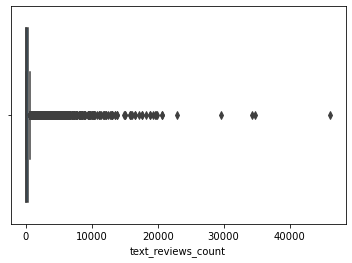

In [28]:
#find outliers of text_reviews_count
sns.boxplot(x=data['text_reviews_count'])

In [29]:
# remove outliers from text_reviews_count
data = data.drop(data.index[data['text_reviews_count'] >= 20000])

In [30]:
data.shape

(9700, 12)

### 2. Feature Engineering

#### language_code:

First we unify all the english language, and then we convert it into ordinal integers

In [31]:
from sklearn.preprocessing import OrdinalEncoder

encoding = {'language_code':{'en-US': 'eng', 'en-GB': 'eng', 'en-CA': 'eng'}} 
data.replace(encoding, inplace=True)

enc = OrdinalEncoder()
enc.fit(data[['language_code']])
data[['language_code']] = enc.fit_transform(data[['language_code']]) 

#### publication_date:

Then we convert data type of publication_date from object into date type

In [32]:
data['publication_date'] = pd.to_datetime(data['publication_date'], format='%m/%d/%Y', errors='coerce') 

In [33]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,8253,Little Town on the Prairie (Little House #7),Laura Ingalls Wilder/Garth Williams,4.19,0060885432,9780060885434,1.0,374,71853,646,2007-01-01,HarperTrophy
1,11101,First Comes Love (Hot Water California #1),Christie Ridgway,3.81,0380818957,9780380818952,1.0,384,1051,47,2002-01-01,Avon Books
2,28193,When Santa Fell to Earth,Cornelia Funke/Paul Howard/Oliver G. Latsch,3.76,043978204X,9780439782043,1.0,167,1840,245,2006-10-01,Chicken House / Scholastic
3,25047,The Case of the Stinky Science Project (Jigsaw...,James Preller/John Speirs/James Preller,3.83,0439114284,9780439114288,1.0,80,162,11,2001-03-01,Scholastic Paperbacks
4,17800,Dance Dance Dance,Haruki Murakami,4.04,0099448769,9780099448761,1.0,393,50169,2117,2002-02-07,Vintage


and check if there is null in this feature(publication_date)

In [34]:
data[data['publication_date'].isnull()]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
4872,45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,2070323285,9782070323289,3.0,640,15,2,NaT,Folio histoire
6457,31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,0553575104,9780553575101,1.0,718,10608,295,NaT,Bantam Books


Since there are only 2 books with null values in publication_date, we simply drop them.

In [35]:
data.shape

(9700, 12)

In [36]:
data.dropna(how = 'any',inplace =True)

check again

In [37]:
data[data['publication_date'].isnull()]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher


Then we extract 'year','month' and 'day' respectively to three new features

In [38]:
data['year'] = pd.DatetimeIndex(data['publication_date']).year

In [39]:
data['month'] = pd.DatetimeIndex(data['publication_date']).month 

In [40]:
data['day'] = pd.DatetimeIndex(data['publication_date']).day

In [41]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year,month,day
0,8253,Little Town on the Prairie (Little House #7),Laura Ingalls Wilder/Garth Williams,4.19,0060885432,9780060885434,1.0,374,71853,646,2007-01-01,HarperTrophy,2007,1,1
1,11101,First Comes Love (Hot Water California #1),Christie Ridgway,3.81,0380818957,9780380818952,1.0,384,1051,47,2002-01-01,Avon Books,2002,1,1
2,28193,When Santa Fell to Earth,Cornelia Funke/Paul Howard/Oliver G. Latsch,3.76,043978204X,9780439782043,1.0,167,1840,245,2006-10-01,Chicken House / Scholastic,2006,10,1
3,25047,The Case of the Stinky Science Project (Jigsaw...,James Preller/John Speirs/James Preller,3.83,0439114284,9780439114288,1.0,80,162,11,2001-03-01,Scholastic Paperbacks,2001,3,1
4,17800,Dance Dance Dance,Haruki Murakami,4.04,0099448769,9780099448761,1.0,393,50169,2117,2002-02-07,Vintage,2002,2,7


#### title:

By adding a new feature named num_occ, which means the occurrence of each title, we can check if there are some duplicate books title.

In [42]:
data['num_occ'] = data.groupby('title')['title'].transform('count')

In [43]:
data[data["num_occ"] > 1]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year,month,day,num_occ
8,37387,The Prime of Miss Jean Brodie / The Girls of S...,Muriel Spark,3.79,1857152743,9781857152746,1.0,512,1477,90,2004-05-06,Random House,2004,5,6,2
18,4888,The Drama of the Gifted Child: The Search for ...,Alice Miller,4.09,046501691X,9780465016914,1.0,118,97,10,1983-06-01,Basic Books,1983,6,1,2
31,1823,Them: Adventures with Extremists,Jon Ronson,3.95,0743233212,9780743233217,1.0,336,11990,831,2003-01-07,Simon Schuster,2003,1,7,2
45,32656,The Return of the Native,Thomas Hardy/Phillip Mallett,3.86,0393927873,9780393927870,1.0,552,44,5,2006-02-14,W. W. Norton & Company,2006,2,14,2
55,23802,Bargaining for Advantage: Negotiation Strategi...,G. Richard Shell,3.95,0140281916,9780140281910,1.0,304,37,1,2000-06-01,Penguin Books,2000,6,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,6388,The Da Vinci Code (Robert Langdon #2),Dan Brown,3.84,0385504217,9780385504218,1.0,522,2780,334,2003-03-18,Doubleday Publishing (NY),2003,3,18,3
9982,30289,The Republic,Plato/Desmond Lee/Maria Helena da Rocha Pereir...,3.94,0140449140,9780140449143,1.0,416,136467,2013,2003-02-25,Penguin Classics,2003,2,25,2
9989,42029,Girls' Night In,Jessica Adams/Chris Manby/Fiona Walker,3.26,0006514855,9780006514855,1.0,586,140,11,2000-07-03,HarperCollins,2000,7,3,2
9991,15688,L'Étranger,Albert Camus,3.98,2070360024,9782070360024,3.0,184,13454,765,2000-03-02,Gallimard,2000,3,2,2


We do the following processingg:
1.For the pages number and average rating of each duplicate books, we take the average value of them.
2.For the text reviews count and ratings count, we calculate the total value.

In [44]:
data['num_pages'] = data.groupby('title')['num_pages'].transform('mean')

In [45]:
data['average_rating'] = data.groupby('title')['average_rating'].transform('mean')

In [46]:
data['text_reviews_count'] = data.groupby('title')['text_reviews_count'].transform('sum') 

In [47]:
data['ratings_count'] = data.groupby('title')['ratings_count'].transform('sum')

Then we eliminate the duplicate books, and delete the new feature we use to find the duplicated.

In [48]:
data= data[~data.duplicated(subset='title')] 

In [49]:
data.drop(['num_occ'], axis=1, inplace=True)

In [50]:
data.shape

(9093, 15)

#### num_pages:

We find the value of feature num_pages in some books is zero, we use mode to fill them.

In [51]:
# check 0 value in num_pages
data[data['num_pages'] == 0].head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year,month,day
278,22077,The Michael Crichton Collection: Jurassic Park...,Michael Crichton/Chris Noth/Anthony Heald,4.29,0375415807,9780375415807,1.0,0.0,107,3,2000-06-09,Random House Audio,2000,6,9
307,21365,From the Corner of His Eye,Dean Koontz/Stephen Lang,4.03,0553502697,9780553502695,1.0,0.0,29,3,2000-12-26,Random House Audio Publishing Group,2000,12,26
424,17766,Master and Commander (Aubrey/Maturin Book 1),Patrick O'Brian,4.10,073931565X,9780739315651,1.0,0.0,1,0,2004-03-09,Random House Audio,2004,3,9
777,44748,The Mask of the Enchantress,Victoria Holt,3.85,0449210847,9780449210840,1.0,0.0,21,1,1981-10-12,Ivy Books,1981,10,12
779,13106,The Celestine Prophecy,James Redfield/Lou Diamond Phillips,3.64,1594831955,9781594831959,1.0,0.0,64,10,2006-02-16,Grand Central Publishing,2006,2,16
851,26327,The Power of Truth: A Leading with Emotional I...,Daniel Goleman/Warren Bennis,3.82,1593979746,9781593979744,1.0,0.0,11,2,2006-11-14,Macmillan Audio,2006,11,14
877,7674,The Michael Crichton Collection: Airframe / Th...,Michael Crichton/Stephen Lang/Anthony Heald/Bl...,4.16,0739340336,9780739340332,1.0,0.0,267,7,2006-08-29,Random House Audio,2006,8,29
1034,35735,The Silmarillion Volume 3,J.R.R. Tolkien/Martin Shaw,4.19,0553525026,9780553525021,1.0,0.0,60,4,1998-09-01,Random House Audio,1998,9,1
1369,21933,Point Of Impact (Bob Lee Swagger #1),Stephen Hunter/Beau Bridges,4.27,0739344242,9780739344248,1.0,0.0,15,1,2007-01-09,RH Audio,2007,1,9
1647,8889,Return to the Planet of the Apes #2: Escape fr...,William Arrow,3.00,0345251679,9780345251671,1.0,0.0,10,2,1976-04-12,Ballantine Books,1976,4,12


In [52]:
#find how many books with zero num_pages
data[data['num_pages'] == 0].shape

(54, 15)

In [53]:
#calculate the mode of num_pages
data_series = pd.Series(data = data.num_pages)
print('Mode of num_pages:',data_series.mode())

Mode of num_pages: 0    288.0
dtype: float64


In [54]:
#first convert 0 into null
data.num_pages = data.num_pages.replace(0, np.nan)
#then replace them by mode of num_pages
data.num_pages.fillna(data_series.mode()[0], inplace=True) 

In [55]:
#check again
data[data['num_pages'] == 0].shape

(0, 15)

In [56]:
data.shape

(9093, 15)

#### authors_occ:

we believe that counting the occurences of authors will help our model's prediction， we add a new feature named authors_occ to store this value.

In [57]:
data['authors_occ'] = data.groupby('authors')['authors'].transform('count')

In [58]:
data.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year,month,day,authors_occ
0,8253,Little Town on the Prairie (Little House #7),Laura Ingalls Wilder/Garth Williams,4.19,0060885432,9780060885434,1.0,374.0,71853,646,2007-01-01,HarperTrophy,2007,1,1,6
1,11101,First Comes Love (Hot Water California #1),Christie Ridgway,3.81,0380818957,9780380818952,1.0,384.0,1051,47,2002-01-01,Avon Books,2002,1,1,1
2,28193,When Santa Fell to Earth,Cornelia Funke/Paul Howard/Oliver G. Latsch,3.76,043978204X,9780439782043,1.0,167.0,1840,245,2006-10-01,Chicken House / Scholastic,2006,10,1,1
3,25047,The Case of the Stinky Science Project (Jigsaw...,James Preller/John Speirs/James Preller,3.83,0439114284,9780439114288,1.0,80.0,162,11,2001-03-01,Scholastic Paperbacks,2001,3,1,1
4,17800,Dance Dance Dance,Haruki Murakami,4.04,0099448769,9780099448761,1.0,393.0,50169,2117,2002-02-07,Vintage,2002,2,7,2


#### total_ratings
calculate the total ratings of each books, add a new feature

In [59]:
data['rate_weight_2'] = data['average_rating'] * data['ratings_count']

#### rate_per_pages
calculate the rate for each pages

In [60]:
data['rate_per_pages'] = data['average_rating'] * data['num_pages']

#### text_reviews_ratings

In [61]:
data['text_reviews_ratings'] = data['average_rating']*data['text_reviews_count']

In [62]:
from sklearn.preprocessing import LabelEncoder
#encode title column
le = LabelEncoder()
data['title'] = le.fit_transform(data['title'])

In [63]:
#encode authors column
data['authors'] = le.fit_transform(data['authors'])

In [64]:
#encode publisher
data['publisher'] = le.fit_transform(data['publisher'])

In [65]:
data.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year,month,day,authors_occ,rate_weight_2,rate_per_pages,text_reviews_ratings
0,8253,3631,3140,4.19,0060885432,9780060885434,1.0,374.0,71853,646,2007-01-01,814,2007,1,1,6,301064.07,1567.06,2706.74
1,11101,2266,820,3.81,0380818957,9780380818952,1.0,384.0,1051,47,2002-01-01,143,2002,1,1,1,4004.31,1463.04,179.07
2,28193,8770,904,3.76,043978204X,9780439782043,1.0,167.0,1840,245,2006-10-01,345,2006,10,1,1,6918.40,627.92,921.20
3,25047,6144,2376,3.83,0439114284,9780439114288,1.0,80.0,162,11,2001-03-01,1566,2001,3,1,1,620.46,306.40,42.13
4,17800,1526,1971,4.04,0099448769,9780099448761,1.0,393.0,50169,2117,2002-02-07,1891,2002,2,7,2,202682.76,1587.72,8552.68


# Creating Model
We firstly drop some useless features

In [66]:
X = data.drop(['bookID','average_rating','isbn','isbn13','publication_date'],axis = 1)
y = data['average_rating']

In [67]:
X.head(5)

,title,authors,language_code,num_pages,ratings_count,text_reviews_count,publisher,year,month,day,authors_occ,rate_weight_2,rate_per_pages,text_reviews_ratings
0,3631,3140,1.0,374.0,71853,646,814,2007,1,1,6,301064.07,1567.06,2706.74
1,2266,820,1.0,384.0,1051,47,143,2002,1,1,1,4004.31,1463.04,179.07
2,8770,904,1.0,167.0,1840,245,345,2006,10,1,1,6918.40,627.92,921.20
3,6144,2376,1.0,80.0,162,11,1566,2001,3,1,1,620.46,306.40,42.13
4,1526,1971,1.0,393.0,50169,2117,1891,2002,2,7,2,202682.76,1587.72,8552.68


In [68]:
y.head(5)

0    4.19
1    3.81
2    3.76
3    3.83
4    4.04
Name: average_rating, dtype: float64

split the train dateset and test dateset from train_data

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

## Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [71]:
predictions = lr.predict(X_test)

In [72]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,4.26,4.272648
1,4.31,4.244475
2,4.09,4.057337
3,4.00,3.967868
4,3.93,3.928892
5,3.99,3.957353
6,3.78,3.960734
7,3.85,3.779748
8,4.17,4.123480
9,3.76,3.706241


Text(0, 0.5, 'Predicted Values')

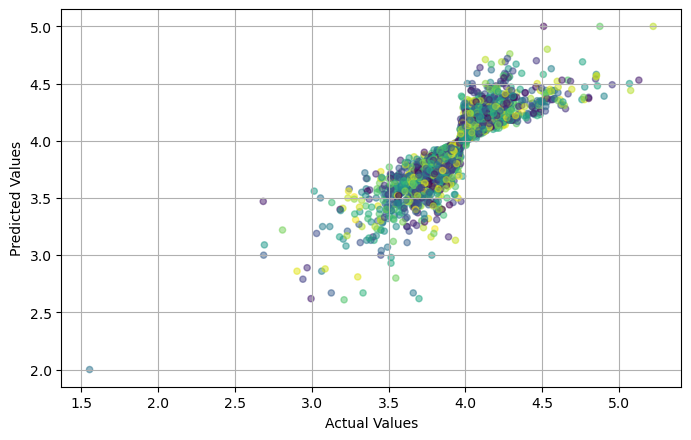

In [73]:
#plot predicted and actual value
plt.figure(num=None, figsize=(8, 5), dpi=100)
colors = np.random.rand(2728),
plt.scatter(predictions,y_test,s= 20.0,c=colors,alpha= 0.5)
plt.grid(True)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [74]:
# evaluate the performance of the algorithm
from sklearn import metrics
print('r2_score:',metrics.r2_score(y_test,predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))#平均绝对误差
print('MSE:', metrics.mean_squared_error(y_test, predictions))#均方误差
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#均方根误差

r2_score: 0.7652363022949135
MAE: 0.09200610935801891
MSE: 0.01974128189009947
RMSE: 0.14050367215877124


## RandomForest

In [75]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 700,
                                     min_samples_split= 2,
                                     min_samples_leaf= 1, 
                                     max_features='auto',
                                     max_depth=100,
                                     bootstrap= True,
                                     random_state = 42)
model.fit(X_train,y_train)


RandomForestRegressor(max_depth=100, n_estimators=700, random_state=42)

In [76]:
rf_pre = model.predict(X_test)

In [77]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': rf_pre.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,4.26,4.265629
1,4.31,4.273224
2,4.09,4.091171
3,4.00,4.016043
4,3.93,3.933750
5,3.99,3.994143
6,3.78,4.039671
7,3.85,3.873700
8,4.17,4.174271
9,3.76,3.759400


Text(0, 0.5, 'Predicted Values')

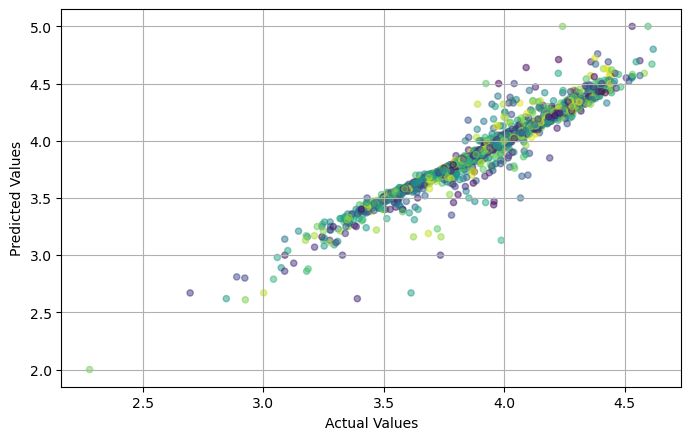

In [78]:
#plot predicted and actual value
plt.figure(num=None, figsize=(8, 5), dpi=100)
colors = np.random.rand(2728),
plt.scatter(rf_pre,y_test,s= 20.0,c=colors,alpha= 0.5)
plt.grid(True)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [79]:
print('r2_score:',metrics.r2_score(y_test, rf_pre))
print('MAE:', metrics.mean_absolute_error(y_test, rf_pre))#平均绝对误差
print('MSE:', metrics.mean_squared_error(y_test, rf_pre))#均方误差
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pre)))#均方根误差

r2_score: 0.922760423166614
MAE: 0.03490276853043246
MSE: 0.006495076854920545
RMSE: 0.0805920396498348
